# Predicting The Number of People in a Room Using a Gaussian Naive Bayes Classifier

In this notebook, we will use the SciKit library to make models with the objective of predicting the number of people present in a closed environment with non-intrusive data, such as temperature of the room, the amount of noise or if movement is being detected.

First, we will need to import an additional library to better deal with the data: Pandas.

In [120]:
import pandas as pd

Then we will import the database that will be using to train our classifier.

In [121]:
df = pd.read_csv('data/database.csv', sep=',')
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


Let's check for the properties of our dataset to better know the data we currently have.

In [122]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


The mean of our column labeled "Room Occupancy Count" is looking a bit weird. Its values should vary between 0 and 3, so the mean shouldn't be so close to 0 unless there are many more rows with a zero compared to the the other possible numbers. Let's look at it.


In [123]:
df.Room_Occupancy_Count.value_counts()

0    8228
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64

As expected, the number of zeros is way bigger than the rest. Taking a look at the data, we can see that it is mostly related to non-work hours, specially late at night. There's also the days 24/12 and 25/12, which are holidays and, as such, have an empty environment leading to more data with zero as the occupancy count. We will take all of these out and see how it affects the data.

In [124]:
# Taking out the excessive amounts of zero with times and dates that provide similar data, and making sure indexing remains correct
df_balanced = df.loc[((df.Time > '10:00:00') & (df.Time < '20:00:00') & \
                     ((df.Time < '14:20:00') | (df.Time > '15:20:00')) & \
                     (df.Date != '2017/12/24') & (df.Date != '2017/12/25'))].reset_index(drop=1)

# Round the slope
df_balanced['S5_CO2_Slope'] = df_balanced['S5_CO2_Slope'].round(3)

df_balanced

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.254,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,2018/01/10,19:57:57,25.56,25.50,25.19,25.63,0,0,0,0,0.07,0.05,0.05,0.09,435,-2.050,0,0,0
2450,2018/01/10,19:58:27,25.56,25.50,25.19,25.63,0,0,0,0,0.07,0.04,0.05,0.09,430,-2.192,0,0,0
2451,2018/01/10,19:58:58,25.56,25.50,25.19,25.63,0,0,0,0,0.07,0.05,0.06,0.09,435,-2.154,0,0,0
2452,2018/01/10,19:59:28,25.50,25.50,25.19,25.63,0,0,0,0,0.07,0.05,0.05,0.09,435,-2.127,0,0,0


Let's see if our data seems more balanced this time.

In [125]:
df_balanced.Room_Occupancy_Count.value_counts()

2    748
3    694
0    553
1    459
Name: Room_Occupancy_Count, dtype: int64

Yes, it does! Now, before trying to change the data any further, we will try to train a model so we can see how well it will perform as of now. We won't consider the date and time columns as they shouldn't be important to decide whether there are people in the room or not.

It is important to say that any Naive Bayes uses the idea that the variables used to predict the classes are independent one from the other. Because of that, we will also drop the CO2 column to keep the CO2 slope, since they're closely related. Also, because we are using the Gaussian Naive Bayes, we will be taking off the PIR values as they're binary, not continuous.

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [127]:
# Split the data into testing and validation
X = df_balanced.drop(['Room_Occupancy_Count', 'Time', 'Date', 'S5_CO2', 'S6_PIR', 'S7_PIR'], axis=1)
y = df_balanced['Room_Occupancy_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

In [128]:
# Train a Gaussian Naive Bayes model 
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [129]:
# Obtain accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8548168249660787


In [130]:
# Compare the scores between each set to check for overfitting/underfitting
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8433
Test set score: 0.8548


/home/murilobn/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


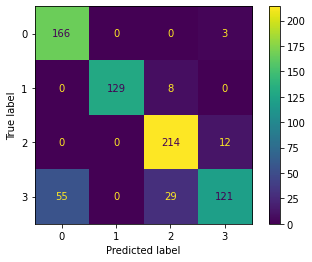

In [131]:
# Better visualize how the model is performing through a confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gnb, X_test, y_test)
plt.savefig('models/5.png')
plt.show()

The accuracy is great and it doesn't look to have any signs of overfitting. To be honest, it looks a little too good to be true, so let's change the data a little to look for what the model was able to learn that made it look so good. For that, we will take the average of the sensors, excluding light, and see if the average room temperature or the average sound in the room changes anything for the model compared to the previous attempt. 

In [132]:
# Calculate averages and round values
df_avg = df_balanced
df_avg['S1_Temp'] = round((df_avg['S1_Temp'] + df_avg['S2_Temp'] + df_avg['S3_Temp'] + df_avg['S4_Temp'])/4, 3)
df_avg['S1_Sound'] = round((df_avg['S1_Sound'] * df_avg['S2_Sound'] * df_avg['S3_Sound'] * df_avg['S4_Sound']) ** (1/4), 3)

# Remove unneeded columns
df_avg = df_avg.drop(labels=['Date', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'Time', 'S5_CO2', 'S6_PIR',	'S7_PIR'], axis=1)

# Reorganize the DataFrame after modifications
df_avg = df_avg.rename(columns={"S1_Temp" : "Avg_Temp", "S1_Sound" : "Avg_Sound"})
df_avg = df_avg.reset_index(drop=1)

# Test print
df_avg

,Avg_Temp,S1_Light,S2_Light,S3_Light,S4_Light,Avg_Sound,S5_CO2_Slope,Room_Occupancy_Count
0,24.908,121,34,53,40,0.086,0.769,1
1,24.922,121,33,53,40,0.114,0.646,1
2,24.922,121,34,53,40,0.123,0.519,1
3,24.938,121,34,53,40,0.139,0.388,1
4,24.938,121,34,54,40,0.079,0.254,1
...,...,...,...,...,...,...,...,...
2449,25.470,0,0,0,0,0.063,-2.050,0
2450,25.470,0,0,0,0,0.060,-2.192,0
2451,25.470,0,0,0,0,0.066,-2.154,0
2452,25.455,0,0,0,0,0.063,-2.127,0


In [133]:
# Split the data into testing and validation
X = df_avg.drop(['Room_Occupancy_Count'], axis=1)
y = df_avg['Room_Occupancy_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

In [134]:
# Train a Gaussian Naive Bayes model 
gnb_avg = GaussianNB()
gnb_avg.fit(X_train, y_train)
y_pred = gnb_avg.predict(X_test)

In [135]:
# Obtain accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8534599728629579


In [136]:
# Compare the scores between each set to check for overfitting/underfitting
print('Training set score: {:.4f}'.format(gnb_avg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb_avg.score(X_test, y_test)))

Training set score: 0.8247
Test set score: 0.8535


/home/murilobn/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


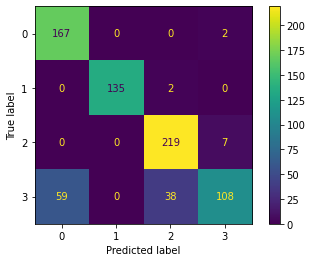

In [137]:
plot_confusion_matrix(gnb_avg, X_test, y_test)  
plt.show()

Barely anything changed, which tells us that the sensors may be pretty aligned with one another. Let's try to see if changing the way the model is dealing with the light in the room changes anything by using the total light in the room.

In [138]:
df_totalLight = df_avg
df_totalLight['S1_Light'] = df_totalLight['S1_Light'] + df_totalLight['S2_Light'] + df_totalLight['S3_Light'] + df_totalLight['S4_Light']
df_totalLight = df_totalLight.drop(['S2_Light', 'S3_Light', 'S4_Light'], axis=1)
df_totalLight = df_totalLight.rename(columns={'S1_Light':'Total_light'})
df_totalLight

,Avg_Temp,Total_light,Avg_Sound,S5_CO2_Slope,Room_Occupancy_Count
0,24.908,248,0.086,0.769,1
1,24.922,247,0.114,0.646,1
2,24.922,248,0.123,0.519,1
3,24.938,248,0.139,0.388,1
4,24.938,249,0.079,0.254,1
...,...,...,...,...,...
2449,25.470,0,0.063,-2.050,0
2450,25.470,0,0.060,-2.192,0
2451,25.470,0,0.066,-2.154,0
2452,25.455,0,0.063,-2.127,0


In [139]:
# Split the data into testing and validation
X = df_totalLight.drop(['Room_Occupancy_Count'], axis=1)
y = df_totalLight['Room_Occupancy_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

In [140]:
# Train a Gaussian Naive Bayes model 
gnb_totalLight = GaussianNB()
gnb_totalLight.fit(X_train, y_train)
y_pred = gnb_totalLight.predict(X_test)

In [141]:
# Obtain accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8439620081411127


In [142]:
# Compare the scores between each set to check for overfitting/underfitting
print('Training set score: {:.4f}'.format(gnb_totalLight.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb_totalLight.score(X_test, y_test)))

Training set score: 0.8346
Test set score: 0.8440


/home/murilobn/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


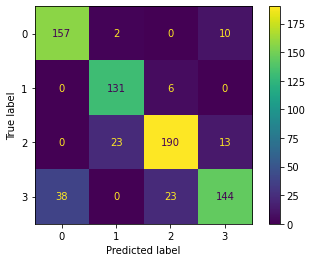

In [143]:
plot_confusion_matrix(gnb_totalLight, X_test, y_test)  
plt.show()

Pretty much nothing changed, which is a bit odd. The Naives Bayes Classifier isn't supposed to be that robust, which means some kind of information present in the data is actually leading it to the current results.

Taking a look at the report with how the data was acquired, the light of the room was strictly controlled. There were lamps in each desk that were only turned on if someone was using it, as such, that incresed the light detected by the sensor and may make our model overly reliant in that parameter. Let's try to take it off and see what happens.

In [144]:
# Split the data into testing and validation
X = df_totalLight.drop(['Room_Occupancy_Count', 'Total_light'], axis=1)
y = df_totalLight['Room_Occupancy_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

In [145]:
# Train a Gaussian Naive Bayes model 
gnb_noLight = GaussianNB()
gnb_noLight.fit(X_train, y_train)
y_pred = gnb_noLight.predict(X_test)

In [146]:
# Obtain accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.592944369063772


In [147]:
# Compare the scores between each set to check for overfitting/underfitting
print('Training set score: {:.4f}'.format(gnb_noLight.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb_noLight.score(X_test, y_test)))

Training set score: 0.6045
Test set score: 0.5929


/home/murilobn/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


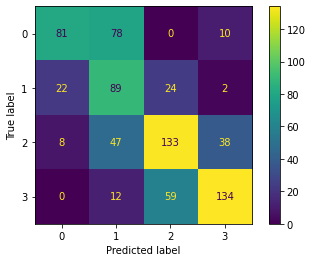

In [148]:
plot_confusion_matrix(gnb_noLight, X_test, y_test)
plt.savefig('models/6.png')
plt.show()

Performance gets much worse all around. Let's try building a model taking off the temperature but keeping the light and see if it's just a coincidence.

In [149]:
df_test = df_avg
# Split the data into testing and validation
X = df_test.drop(['Room_Occupancy_Count', 'Avg_Temp'], axis=1)
y = df_test['Room_Occupancy_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

In [150]:
# Train a Gaussian Naive Bayes model 
gnb_test = GaussianNB()
gnb_test.fit(X_train, y_train)
y_pred = gnb_test.predict(X_test)

In [151]:
# Obtain accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8222523744911805


In [152]:
# Compare the scores between each set to check for overfitting/underfitting
print('Training set score: {:.4f}'.format(gnb_test.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb_test.score(X_test, y_test)))

Training set score: 0.8247
Test set score: 0.8223


/home/murilobn/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


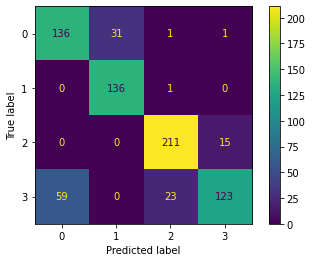

In [153]:
plot_confusion_matrix(gnb_test, X_test, y_test)  
plt.show()

Pretty much back to where we were. So it is clear that the model is relying in light being totally controled in the environment to have great performance. As such, let's try to train a model without any information of the light sensors, but keeping all of the others sensors and see if the classifier can do any better.

In [154]:
# Split the data into testing and validation
X = df_balanced.drop(['Room_Occupancy_Count', 'S1_Light', 'S2_Light', 'S3_Light',	'S4_Light', 'Time', 'Date', 'S5_CO2', 'S6_PIR', 'S7_PIR'], axis=1)
y = df_balanced['Room_Occupancy_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

In [155]:
# Train a Gaussian Naive Bayes model 
gnb_noLight2 = GaussianNB()
gnb_noLight2.fit(X_train, y_train)
y_pred = gnb_noLight2.predict(X_test)

In [156]:
# Obtain accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5671641791044776


In [157]:
# Compare the scores between each set to check for overfitting/underfitting
print('Training set score: {:.4f}'.format(gnb_noLight2.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb_noLight2.score(X_test, y_test)))

Training set score: 0.5836
Test set score: 0.5672


/home/murilobn/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


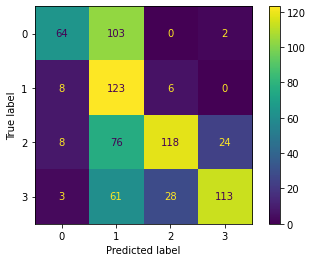

In [158]:
plot_confusion_matrix(gnb_noLight2, X_test, y_test)
plt.savefig('models/7.png')
plt.show()

Accuracy gets worse, just like pretty much everything else in the matrix. More mistakes being done everywhere, and those mistakes are worse, as we can see for example in the predictions for class 3, where most of the mistakes are actually predicting class 1, which is not even an neighbor of class 3. Because of that, we will keep using the model with the average values instead of all the sensors. As a last test, we will use the CO2 ppm instead of the average to see if accuracy improves.

In [159]:
df_ppm = df_totalLight.drop(['Total_light'], axis=1)
df_ppm['S5_CO2_Slope'] = df_balanced['S5_CO2']
df_ppm

,Avg_Temp,Avg_Sound,S5_CO2_Slope,Room_Occupancy_Count
0,24.908,0.086,390,1
1,24.922,0.114,390,1
2,24.922,0.123,390,1
3,24.938,0.139,390,1
4,24.938,0.079,390,1
...,...,...,...,...
2449,25.470,0.063,435,0
2450,25.470,0.060,430,0
2451,25.470,0.066,435,0
2452,25.455,0.063,435,0


In [160]:
# Split the data into testing and validation
X = df_ppm.drop(['Room_Occupancy_Count'], axis=1)
y = df_ppm['Room_Occupancy_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

In [161]:
# Train a Gaussian Naive Bayes model 
gnb_ppm = GaussianNB()
gnb_ppm.fit(X_train, y_train)
y_pred = gnb_ppm.predict(X_test)

In [162]:
# Obtain accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5630936227951153


In [163]:
# Compare the scores between each set to check for overfitting/underfitting
print('Training set score: {:.4f}'.format(gnb_ppm.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb_ppm.score(X_test, y_test)))

Training set score: 0.5684
Test set score: 0.5631


/home/murilobn/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


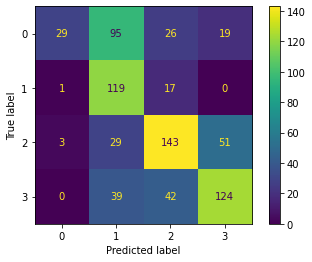

In [164]:
plot_confusion_matrix(gnb_ppm, X_test, y_test)  
plt.show()

Although accuracy didn't change much, the confusion matrix looks worse compared to the "gnb_noLight" model, with this one having more mistakes all over the place. We believe that the model that best represents what we should expect from the Gaussian Naive Bayes model for the problem is the one we called "gnb_noLight", which takes take average values for temperature and sound, also using the CO2 slope and not taking light and PIR into account. Let's take a look on more metrics to see more details of how the model is currently performing.

In [165]:
# Split the data into testing and validation
X = df_totalLight.drop(['Room_Occupancy_Count', 'Total_light'], axis=1)
y = df_totalLight['Room_Occupancy_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

In [166]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.17      0.29       169
           1       0.42      0.87      0.57       137
           2       0.63      0.63      0.63       226
           3       0.64      0.60      0.62       205

    accuracy                           0.56       737
   macro avg       0.64      0.57      0.53       737
weighted avg       0.65      0.56      0.54       737



Precision and recall are the metrics we are looking for here. Precision indicates the amount positive identifications for the class that were actually correct, while recall indicates how many of the positive predictions made for the class were correct. We can see that our model actually is really good when predicting class 0, and it is also good with getting most of the class 1 predictions that were true. But that's pretty much all of the positive and is not much. The model in general is pretty lackluster in most of the scenarios.

Now let's try to do a 10-fold cross validation to see if the performance of our model is actually being constant or if it is relying in getting certain data to get its accuracy.

In [167]:
# Applying 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb_noLight, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

# Compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.62209302 0.54651163 0.62790698 0.55232558 0.62209302 0.70930233
 0.56395349 0.61988304 0.59064327 0.57894737]
Average cross-validation score: 0.6034


Our average is pretty close to the accuracy obtained before, so it looks like our model is not relying in getting the right data to work as it is. Looking at the array of scores, they can vary quite a bit, getting up to 0.70 scores, but also as low as 0.54.

The general conclusion is that the Gaussian Naive Bayes is just not best suited for the dataset we were dealing with, which is proven by the low accuracy and other metrics. We can't be sure of how it would actually perform if light was actually measured without strict control, but we can not trust the model built with the lights on as it is strictly with that information, and it was the only situation where the model actually performed well.

## Extra - Random Forest Classifier

Since Naive Bayes assumes that every variable is independent, we can actually mix different classifiers to try getting better results. The problem is that Scikit learn doesn't actually does that by itself, so we would have to do that by hand. The idea is that we can also use the PIR values with the Bernoulli Bayes to boost our Gaussian Naive that seemed to be the most "correct", which we called by "gnb_noLight". 

In [168]:
# Split the data into testing and validation
X = df_totalLight.drop(['Room_Occupancy_Count', 'Total_light'], axis=1)
y = df_totalLight['Room_Occupancy_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

In [169]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0, n_estimators=10)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(metrics.accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8942


In [170]:
# Compare the scores between each set to check for overfitting/underfitting
print('Training set score: {:.4f}'.format(rfc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rfc.score(X_test, y_test)))

Training set score: 0.9959
Test set score: 0.8942


In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       169
           1       0.88      0.92      0.90       137
           2       0.87      0.86      0.86       226
           3       0.88      0.88      0.88       205

    accuracy                           0.89       737
   macro avg       0.90      0.90      0.90       737
weighted avg       0.89      0.89      0.89       737



In [172]:
scores = cross_val_score(rfc, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

# Compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.87790698 0.87790698 0.84302326 0.86046512 0.90116279 0.91860465
 0.84883721 0.91812865 0.88304094 0.90643275]
Average cross-validation score: 0.8836


The small amount of data actually shows slight signs of overfitting with as much as 10 decision trees. Even then, the performance metrics of the model shows that it is actually being able to make a good job at predicting the classes. 

That shows us that while yes, the task can be done, it isn't ideal for a Bayes Classifier. Bayes can be used when there are tons of data because of its low computational cost, and as such it can also learn much more from its data. Because we are also using a Gaussian Naive Bayes, approximating the data to a gaussian distribution also gets better with more data, and as such, the model performance could also improve.